In [1]:
# %matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import pycoco as pcc
import lsst_tools as lsstt

from astropy.cosmology import LambdaCDM

In [2]:
pcc.utils.setup_plot_defaults()

http://iopscience.iop.org/article/10.3847/1538-4357/aa5eb7/pdf

## CC SNe, out to 60 Mpc 

|SN type	|  ${M_*}<{10}^{10}{M}_{\odot }$Number	|Fraction	| Number	| Fraction	| Probability |
| ------------- |---------------- |------------- |------------- |------------- |------------- |
|IIP/L	| ${25}_{-6}^{+6}$	|${0.60}_{-0.14}^{+0.15}$	|${40}_{-7}^{+7}$	|${0.6}_{-0.1}^{+0.1}$	|18%|
|II-87A	| ${3.0}_{-2.0}^{+2.0}$	|${0.08}_{-0.05}^{+0.05}$	|${0.0}_{-0.0}^{+1.8}$	|${0.000}_{-0.000}^{+0.025}$	|1.4%|
|IIn	| ${3.0}_{-2.0}^{+2.0}$	|${0.07}_{-0.05}^{+0.05}$	|${2.0}_{-1.0}^{+1.0}$	|${0.028}_{-0.014}^{+0.014}$	|10%|
|IIb	| ${4.6}_{-2.0}^{+2.3}$	|${0.11}_{-0.05}^{+0.06}$	|${7.6}_{-2.6}^{+2.8}$	|${0.11}_{-0.04}^{+0.04}$	|30%|
|Ib	| ${0.9}_{-0.5}^{+0.7}$	|${0.022}_{-0.012}^{+0.017}$	|${10.1}_{-3.5}^{+4.1}$	|${0.14}_{-0.05}^{+0.06}$	|1.3%|
|Ic	| ${1.8}_{-1.1}^{+1.3}$	|${0.044}_{-0.027}^{+0.032}$	|${5.0}_{-2.0}^{+2.0}$	|${0.07}_{-0.03}^{+0.03}$	|25%|
|(Ib+Ic)a	| ${2.7}_{-1.2}^{+1.5}$	|${0.07}_{-0.03}^{+0.04}$	|${15}_{-4}^{+5}$	|${0.22}_{-0.06}^{+0.07}$	|1.4%|
|IIb-pec	| ${0.6}_{-0.6}^{+0.6}$	|${0.015}_{-0.015}^{+0.015}$	|${0.0}_{-0.0}^{+1.8}$ |	${0.000}_{-0.000}^{+0.025}$	|34%|
|Ic-pec	| ${0.0}_{-0.0}^{+1.8}$	|${0.00}_{-0.00}^{+0.04}$	|${1.0}_{-1.0}^{+1.0}$	|${0.014}_{-0.014}^{+0.014}$	|34%|
|Ic-BL	| ${0.4}_{-0.4}^{+0.4}$	|${0.01}_{-0.01}^{+0.01}$	|${1.5}_{-1.0}^{+1.0}$	|${0.021}_{-0.014}^{+0.014}$	|61%|
|Ca-rich	|${1.3}_{-1.3}^{+1.3}$	|${0.03}_{-0.03}^{+0.03}$	|${2.4}_{-1.3}^{+1.4}$	|${0.034}_{-0.018}^{+0.020}$	|41%|
Total	40.8	70.6	 


|SN Type|Number|
|:----|:----|
|IIb | 12.2|
|IIb-pec | 0.6 |
|Ib | 11|
|Ic | 6.8|
|Ic-pec |1.0|
|Ic-bl|1.9|

total = 33.5

|SN Type|Number|Fraction|
|:----|:----|:----|
|IIb | 12.8|0.382|
|Ib | 11|0.328|
|Ic | 9.7|0.290|

total = 33.5


In [3]:
info = pcc.InfoClass()
info.load()
info.table

snname,z_obs,mu,RA,Dec,Type,SkyCoords
,,,,,,"deg,deg"
str8,float64,float64,str13,str13,str3,object
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,"148.85322791666664,69.02047277777778"
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,"202.47529999999995,47.191805555555554"
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,"165.92491666666666,28.903805555555554"
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,"354.06125,2.1524444444444444"
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,"24.099375,15.753666666666666"
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,"350.2640833333333,-4.8959722222222215"
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,"179.45933333333332,25.265305555555557"
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,"155.9874583333333,-3.191472222222222"


In [4]:
def choose_subtype(return_string = True):
    """
    1|Ib | 11|0.328|
    2|Ic | 9.7|0.290|
    3|IIb | 12.8|0.382|
    total - 33.5
    """
    n = 33.5 * np.random.random()
    
    if n <= 11:
        if return_string:
            return "Ib"
        else:
            return 1
        
    if 11 < n <= 11+9.7:
        if return_string:
            return "Ic"
        else:
            return 2
        
    if 11+9.7 < n <= 11+9.7+12.8:
        if return_string:
            return "IIb"
        else:
            return 3 
    pass

def choose_extinction_host(x0 = 0.0, sigma = 0.2, n = 10000):
    """
    """
    return np.fabs(np.random.normal(loc = x0, scale = sigma, size = n))


def choose_magoffset(x0 = 0.0, sigma = 0.2, n = 10000):
    """
    """
    return np.random.normal(loc = x0, scale = sigma, size = n)


## Tests
Check that the values are OK

---
## Choose Subtype
___

In [5]:
a = []
n = 1000000
for i in np.arange(n):
    a.append(choose_subtype(return_string=False))
a = np.asarray(a)

w1 = np.where(a == 1)
w2 = np.where(a == 2)
w3 = np.where(a == 3)

print(len(a[w1]), len(a[w2]), len(a[w3]))
print(len(a[w1])/n, len(a[w2])/n, len(a[w3])/n)

# 328358 289969 381673
# 0.328358 0.289969 0.381673

328126 289439 382435
0.328126 0.289439 0.382435


## Choose Extinction Host
____

<IPython.core.display.Javascript object>


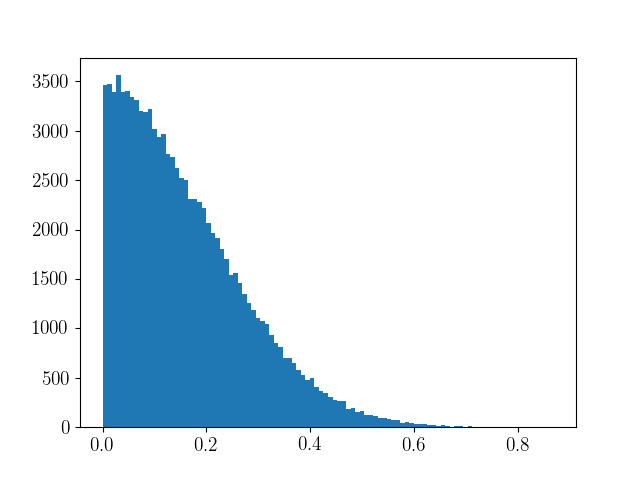

In [6]:
n = 100000
h = plt.hist(choose_extinction_host(n = n), bins = 100)

## Choose Offset
___

<IPython.core.display.Javascript object>


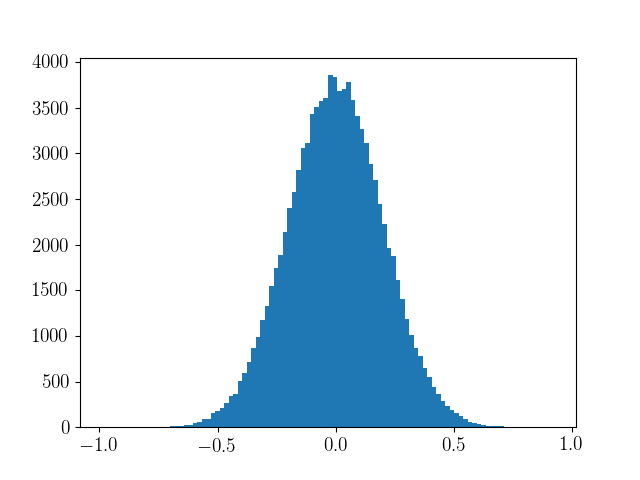

In [7]:
n = 100000
h = plt.hist(choose_magoffset(n = n), bins = 100)

## Choose z_obs
___

<IPython.core.display.Javascript object>


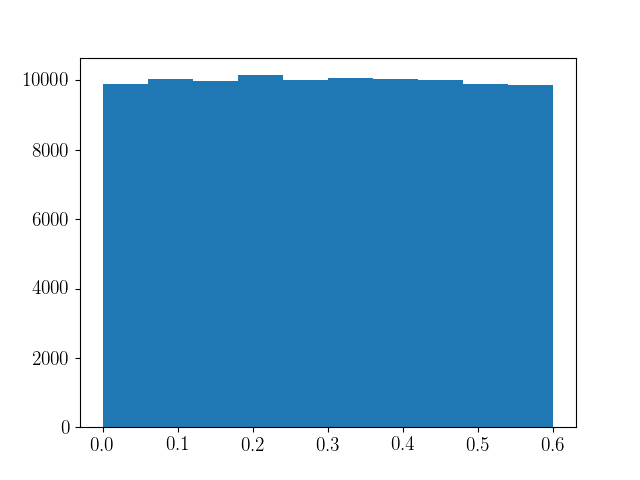

(array([  9901.,  10038.,   9999.,  10152.,  10018.,  10058.,  10053.,
         10026.,   9900.,   9855.]),
 array([  3.10861446e-06,   6.00022798e-02,   1.20001451e-01,
          1.80000622e-01,   2.39999793e-01,   2.99998965e-01,
          3.59998136e-01,   4.19997307e-01,   4.79996478e-01,
          5.39995650e-01,   5.99994821e-01]),
 <a list of 10 Patch objects>)

In [8]:
z_max = 0.6
n =100000

z_dist = z_max * np.random.random(n)

plt.hist(z_dist)

## Choose RAdec
___

In [9]:
nruns = 1000
c = lsstt.generate_coordinates(nruns = nruns, low_ra = 180. - 50.0, high_ra = 180. + 59.0, low_dec = -1.258, high_dec = 1.258)
c

,phi,theta,RA,Dec
0,0.003036,0.802815,3.944407,0.003036
1,-0.019840,-0.782313,2.359280,-0.019840
2,0.001919,-0.734906,2.406687,0.001919
3,-0.001471,-0.063144,3.078449,-0.001471
4,-0.010472,-0.662883,2.478710,-0.010472
5,0.016903,-0.871464,2.270129,0.016903
6,0.000235,0.026572,3.168164,0.000235
7,-0.014458,-0.786623,2.354970,-0.014458
8,-0.000095,-0.857424,2.284168,-0.000095
9,0.018451,0.029660,3.171253,0.018451


<IPython.core.display.Javascript object>


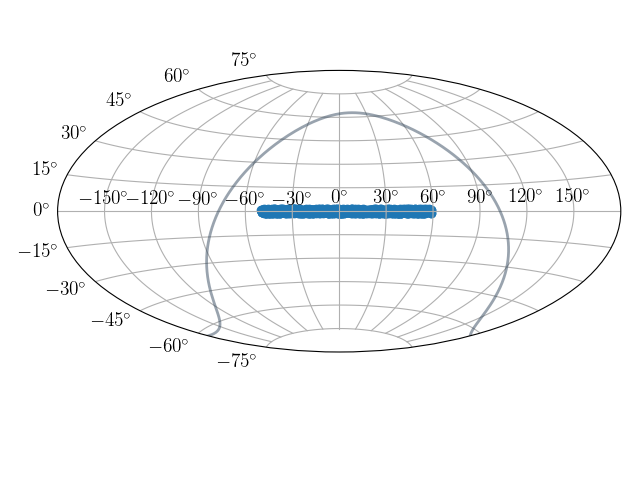

/Users/berto/Code/LSST_tools/lsst_tools


In [10]:
lsstt.plot_position_points(c)

## Retrieve MW Extinction
___

## Volume Element

In [11]:
binsize = 0.001

z = np.arange(0.0, 0.6, binsize)
z_dz = np.arange(0.0+binsize, 0.6+binsize, binsize)

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

v_z = cosmo.comoving_volume(z)

for i, z_iter in enumerate(z):
    print (z[i], v_z[i])
v_z_dz = cosmo.comoving_volume(z_dz)

v_dz = v_z_dz - v_z

0.0 -0.0 Mpc3
0.001 328.82454339331025 Mpc3
0.002 2628.8160261031544 Mpc3
0.003 8866.249898881324 Mpc3
0.004 21002.07822656726 Mpc3
0.005 40991.91462190152 Mpc3
0.006 70786.0468006812 Mpc3
0.007 112329.43407072891 Mpc3
0.008 167561.71737601704 Mpc3
0.009 238417.15903192165 Mpc3
0.01 326824.7783209014 Mpc3
0.011 434708.16567619675 Mpc3
0.012 563985.6684981307 Mpc3
0.013 716570.2907128652 Mpc3
0.014 894369.7028165256 Mpc3
0.015 1099286.1916545783 Mpc3
0.016 1333216.8512601948 Mpc3
0.017 1598053.2915746437 Mpc3
0.018 1895681.9498151473 Mpc3
0.019 2227983.8895923933 Mpc3
0.02 2596834.790866411 Mpc3
0.021 3004105.1307408097 Mpc3
0.022 3451659.9624920427 Mpc3
0.023 3941359.1365401438 Mpc3
0.024 4475057.039301492 Mpc3
0.025 5054602.874424297 Mpc3
0.026 5681840.522170856 Mpc3
0.027 6358608.459064555 Mpc3
0.028 7086739.958772366 Mpc3
0.029 7868062.951487095 Mpc3
0.03 8704400.02392739 Mpc3
0.031 9597568.459514236 Mpc3
0.032 10549380.459341684 Mpc3
0.033 11561642.499352908 Mpc3
0.034 12636156.093

<IPython.core.display.Javascript object>


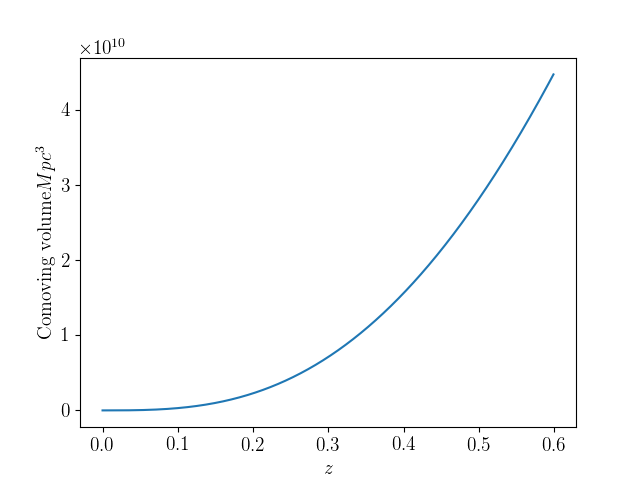

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z, v_z)
# ax.semilogy()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\textnormal{Comoving volume} M pc^3$")

## SFH
___
Hopkins & Beacom

$ \textrm{sfr}=(a+b*z)*h/(1.+(z/c)^d)$

with

$a=0.0170, 
b=0.13, 
c=3.3, 
d=5.3$

In [13]:
binsize = 0.001
z = np.arange(0.0+(binsize/2.), 4+(binsize/2.), binsize)

a=0.0170
b=0.13
c=3.3
d=5.3
h = 0.7

sfr=(a+b*z)*h/(1.+(z/c)**d)

<IPython.core.display.Javascript object>


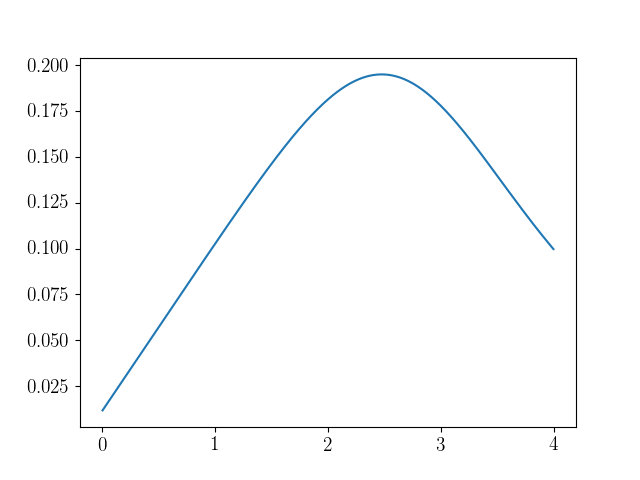

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(z, sfr)

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\textnormal{Star Formation Rate} M pc^3$")

## Fuzz